In [1]:
import pandas as pd
df=pd.read_csv("./credit_scoring_eng.csv")
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,partner,0,224791.862382,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,155999.806512,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,89672.561153,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,244093.050500,buying my own car


In [2]:
from scipy import stats
import numpy as np 
z_score=np.abs(stats.zscore(df['days_employed']))
outliers=df[z_score>3]
print(outliers.shape)

(0, 12)


In [3]:
Q1=df['days_employed'].quantile(0.25)
Q3=df['days_employed'].quantile(0.75)
IQR=Q3-Q1 
l_bound=Q1-1.5*IQR 
u_bound=Q3+1.5*IQR 
outliers=df[(df["days_employed"]<l_bound) | (df["days_employed"]>u_bound)]
print(outliers.shape)

(4467, 12)


In [4]:
df_removed=df[(df["days_employed"]>=l_bound) & (df["days_employed"]<=u_bound)]
df_removed

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
5,0,-926.185831,27,masters degree,0,civil partnership,1,M,partner,0,255763.565419,purchase of the house
6,0,-2879.202052,43,masters degree,0,married,0,F,partner,0,240525.971920,housing transactions
...,...,...,...,...,...,...,...,...,...,...,...,...
21519,1,-2351.431934,37,academic degree,4,divorced,3,M,employee,0,115949.039788,buy commercial real estate
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,partner,0,224791.862382,housing transactions
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,89672.561153,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,244093.050500,buying my own car


In [5]:
df_capped=df.copy()
df_capped["days_employed"]=np.where(df["days_employed"]>u_bound,u_bound,np.where(df["days_employed"]<l_bound,l_bound,df_capped["days_employed"]))
df_capped

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-6431.915133,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,3393.395554,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,partner,0,224791.862382,housing transactions
21521,0,3393.395554,67,secondary education,1,married,0,F,retiree,0,155999.806512,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,89672.561153,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,244093.050500,buying my own car


In [6]:
df_log=df.copy()
df_log["days_employed"]=np.log(df["days_employed"]+1)
df_log

c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,NaN,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,NaN,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,NaN,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,NaN,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,12.737486,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,NaN,43,secondary education,1,civil partnership,1,F,partner,0,224791.862382,housing transactions
21521,0,12.748218,67,secondary education,1,married,0,F,retiree,0,155999.806512,purchase of a car
21522,1,NaN,38,secondary education,1,civil partnership,1,M,employee,1,89672.561153,property
21523,3,NaN,38,secondary education,1,married,0,M,employee,1,244093.050500,buying my own car


In [6]:
df_imp=df.copy()
med=df_imp["days_employed"].median()
df_imp.loc[(df_imp["days_employed"]<l_bound) & (df_imp["days_employed"]>u_bound),"days_employed"]=med 
df_imp

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,partner,0,224791.862382,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,155999.806512,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,89672.561153,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,244093.050500,buying my own car


<Axes: xlabel='days_employed', ylabel='Count'>

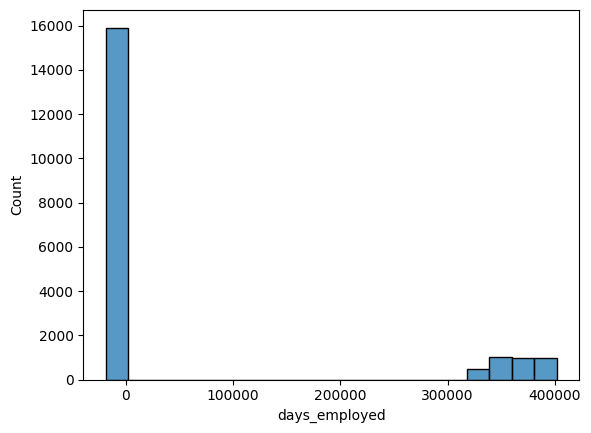

In [8]:
import seaborn as sns 
sns.histplot(data=df,x="days_employed",bins=20)

<Axes: xlabel='days_employed'>

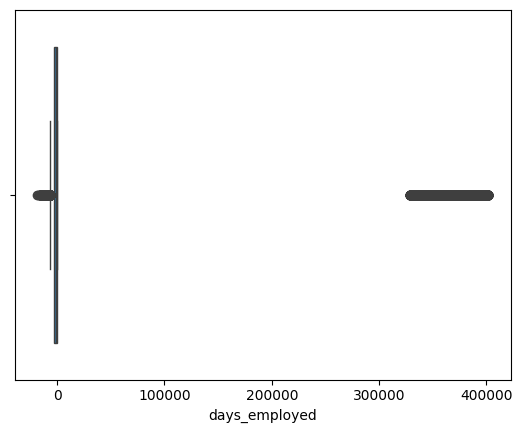

In [9]:
sns.boxplot(data=df,x="days_employed")

<Axes: xlabel='education', ylabel='count'>

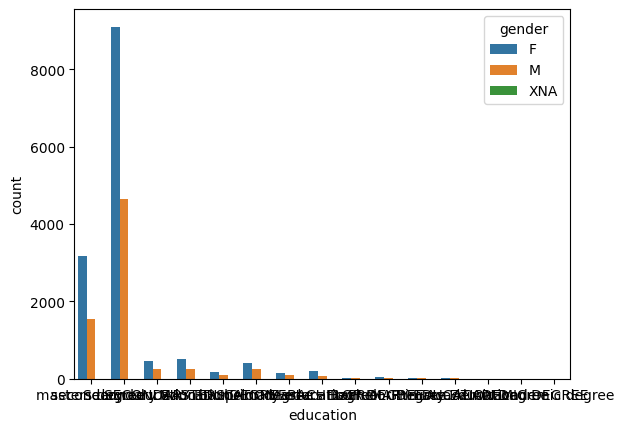

In [10]:
import seaborn as sns
sns.countplot(x="education",hue="gender",data=df)

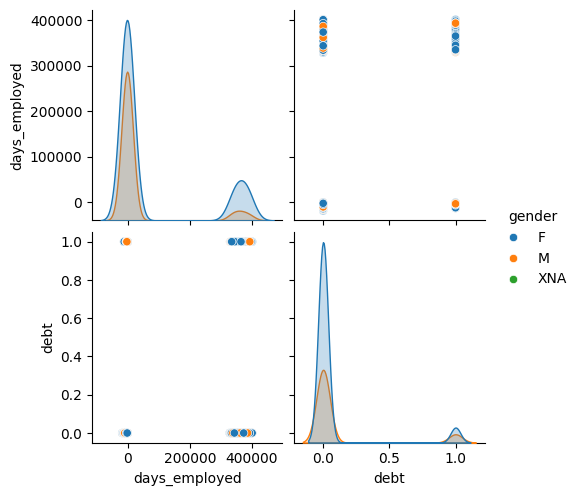

In [11]:
sns.pairplot(df[["days_employed","debt","gender"]],hue="gender")

<Axes: xlabel='total_income', ylabel='days_employed'>

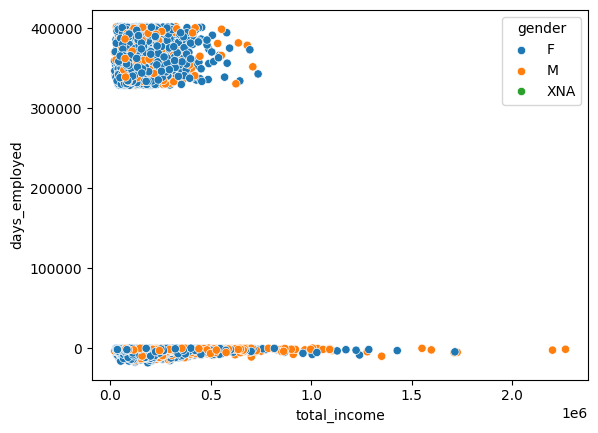

In [12]:
sns.scatterplot(data=df,x="total_income",y="days_employed",hue="gender")

<Axes: xlabel='gender', ylabel='total_income'>

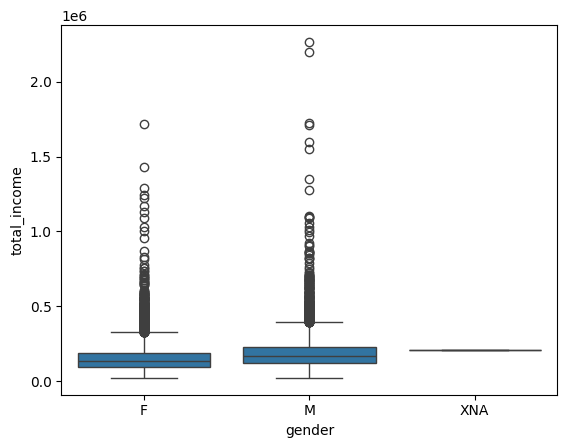

In [13]:
sns.boxplot(data=df,x="gender",y="total_income")